#  H4212 Yi ZHANG  Fatma LARIBI Korantin AIMÉ  Arthur UNGRIA 


April 30 , 2023

Lien vers les datasets

In [128]:
path_mat = "/content/content/student-mat.csv"
path_por = "/content/content/student-por.csv"

## Imports

Afin de l'analyse du modèle, nous introduisons le cadre de shap. SHAP peut être utilisé pour expliquer les causes des prédictions individuelles, ainsi que le comportement du modèle dans son ensemble.

In [129]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import shap

pd.set_option('display.max_columns', None)


## Lecture des données

In [131]:
data_mat = pd.read_csv(path_mat,sep=';')
data_por = pd.read_csv(path_por,sep=';')

## Visualisation et exploration des données 

Explorer la forme des ensembles de données

In [133]:
data_mat.shape 

(395, 33)

In [134]:
data_por.shape 

(649, 33)

In [135]:
data_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [136]:
data_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


On remarque que les colonnes des 2 datasets sont les mêmes. En effet, on possède 2 datasets de la même structure : une pour les notes de Mathématiques et l'autre pour les notes de Portugais.
On explore encore les 2 datasets en utilisant 'head' pour les 5 premiers lignes, et 'tail' pour les 5 derniers lignes.

In [137]:
data_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [138]:
data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [139]:
data_mat.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [140]:
data_por.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,4,10,11,11


Vérifier si les colonnes des deux fichiers correspondent

In [141]:
sum(list(data_mat.columns != data_por.columns))

0

On prend un échantillon aléatoire de chaque dataset:

In [142]:
data_mat.sample()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
38,GP,F,15,R,GT3,T,3,4,services,health,course,mother,1,3,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,2,1,1,5,2,12,12,11


In [143]:
data_por.sample()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
355,GP,F,17,U,GT3,T,2,3,other,other,course,father,2,2,0,no,no,no,yes,yes,yes,yes,yes,4,2,1,1,1,3,2,11,12,14


Avec le .info() on peut voir un sommaire de type data de chaque colonnes, le nombre de valeurs non nulles, et l'utilisation de la mémoire. Il y a des objets dans le dataset, ce qui signifie que nous avons des catégories que nous devons transformer en int.

In [144]:
data_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [145]:
data_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Puisqu'on a vérifié que les 2 datasets ont la même structure, on peut concaténer les 2 datasets pour faciliter leurs manipulations. 

In [146]:
data = pd.concat([data_mat, data_por], ignore_index=True)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


On affiche les domaines des valeurs du dataset:

In [147]:
for col in data.columns:
    print(col,"  ", data[col].unique())

school    ['GP' 'MS']
sex    ['F' 'M']
age    [18 17 15 16 19 22 20 21]
address    ['U' 'R']
famsize    ['GT3' 'LE3']
Pstatus    ['A' 'T']
Medu    [4 1 3 2 0]
Fedu    [4 1 2 3 0]
Mjob    ['at_home' 'health' 'other' 'services' 'teacher']
Fjob    ['teacher' 'other' 'services' 'health' 'at_home']
reason    ['course' 'other' 'home' 'reputation']
guardian    ['mother' 'father' 'other']
traveltime    [2 1 3 4]
studytime    [2 3 1 4]
failures    [0 3 2 1]
schoolsup    ['yes' 'no']
famsup    ['no' 'yes']
paid    ['no' 'yes']
activities    ['no' 'yes']
nursery    ['yes' 'no']
higher    ['yes' 'no']
internet    ['no' 'yes']
romantic    ['no' 'yes']
famrel    [4 5 3 1 2]
freetime    [3 2 4 1 5]
goout    [4 3 2 1 5]
Dalc    [1 2 5 3 4]
Walc    [1 3 2 4 5]
health    [3 5 1 2 4]
absences    [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17 32]
G1    [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3  0]
G2    [ 6  5  8 14 10 15 12 18 16 13  9 11

On remarque que par rapport au fichier de renseignement fourni avec les 2 databases, la colonne de failures prend les valeurs de 0 à 3 au lieu de 1 à 4. On considère que l'erreur est fait au niveau du fichier de renseignement, et pas au niveau des datasets.


In [148]:
data.duplicated().sum()

0

On remarque qu'il n'y a pas de duplication au niveau de nos données.

In [150]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


On remarque que le std de la colonne absences est élevé par rapport aux autres colonnes( = environ 6 ).

In [151]:
data.describe(include="object")

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,772,591,759,738,923,399,584,430,728,925,640,824,528,835,955,827,673


dtypes nous permet d'explorer les types de données qu'on a. Object correspond à une variable catégorique et int est une variable numérique.

In [152]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [153]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Chercher les valeurs nulles

In [154]:

data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

,Total,Percent
school,0,0.0
paid,0,0.0
G2,0,0.0
G1,0,0.0
absences,0,0.0
health,0,0.0
Walc,0,0.0
Dalc,0,0.0
goout,0,0.0
freetime,0,0.0


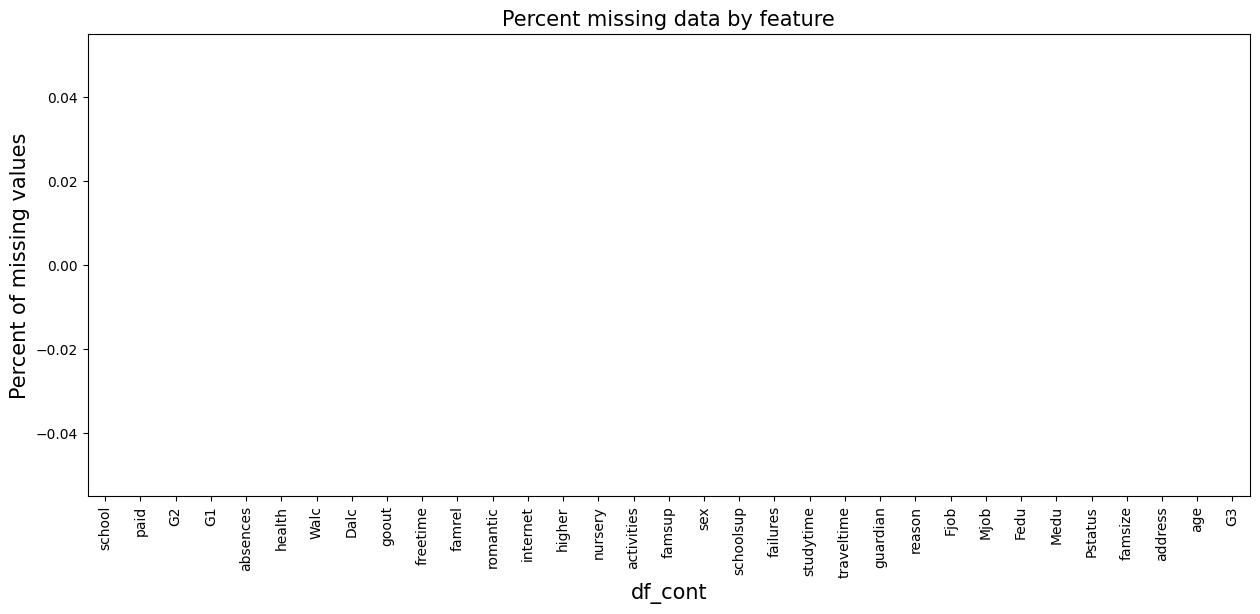

In [155]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))

plt.xticks(rotation=90)

sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('df_cont', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

Aucune valeur manquante ou nulle dans l'ensemble de données, mais les notes = 0 pourraient être des absences, 
Nous traiterons les absences potentielles (note = 0 plus tard dans le processus, pour l'instant nous allons juste explorer les données et détecter les anomalies). 

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

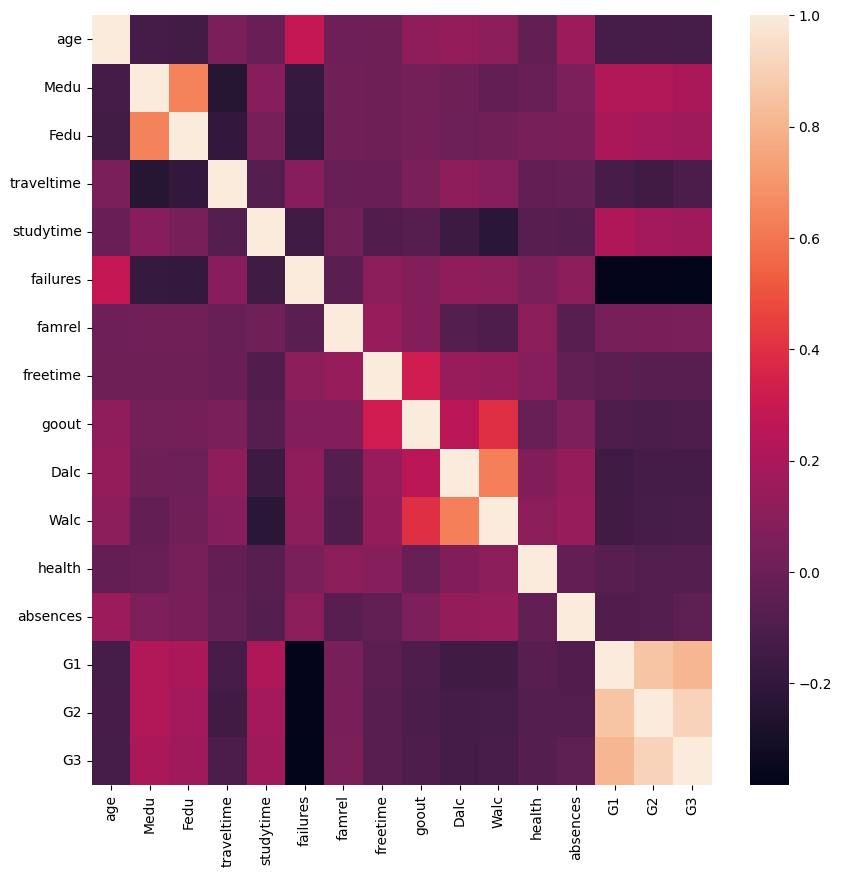

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure( figsize = (10,10))
sns.heatmap(data.corr())

On note les corrélations entre: 
Medu et Fedu (éducation de la mère et du père)
Dalc et Walc qui correspondent à la consommation d'alcool
et les niveaux scolaires G1, G2, et G3 

Il existe aussi une légère corrélation entre goout et Walc, et une très faible corrélation entre les failures et G1, G2, G3.

In [157]:
data = pd.DataFrame(data)
  
print(data.corr())

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.130196 -0.138521    0.049216  -0.007870  0.282364   
Medu       -0.130196  1.000000  0.642063   -0.238181   0.090616 -0.187769   
Fedu       -0.138521  0.642063  1.000000   -0.196328   0.033458 -0.191390   
traveltime  0.049216 -0.238181 -0.196328    1.000000  -0.081328  0.087177   
studytime  -0.007870  0.090616  0.033458   -0.081328   1.000000 -0.152024   
failures    0.282364 -0.187769 -0.191390    0.087177  -0.152024  1.000000   
famrel      0.007162  0.015004  0.013066   -0.012578   0.012324 -0.053676   
freetime    0.002645  0.001054  0.002142   -0.007403  -0.094429  0.102679   
goout       0.118510  0.025614  0.030075    0.049740  -0.072941  0.074683   
Dalc        0.133453  0.001515 -0.000165    0.109423  -0.159665  0.116336   
Walc        0.098291 -0.029331  0.019524    0.084292  -0.229073  0.107432   
health     -0.029129 -0.013254  0.034288   -0.029002  -0.063044  0.048311   

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


On peut voir qu'il existe une très forte corrélation entre les notes des semestre 1, 2 et la note finale. Or nous ne voulons pas entrainer un modèle qui se base principalement sur les notes de l'année pour prédire la note finale mais plutôt avoir un modèle qui s'appuie sur l'ensemble des autres données. C'est pourquoi dans la suite, nous n'inclurons pas les notes des semestres 1 et 2 comme features dans nos modèles.

# Statistiques

## Histogramme

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'traveltime'}>],
       [<Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'failures'}>,
        <Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'freetime'}>],
       [<Axes: title={'center': 'goout'}>,
        <Axes: title={'center': 'Dalc'}>,
        <Axes: title={'center': 'Walc'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>,
        <Axes: title={'center': 'G3'}>]], dtype=object)

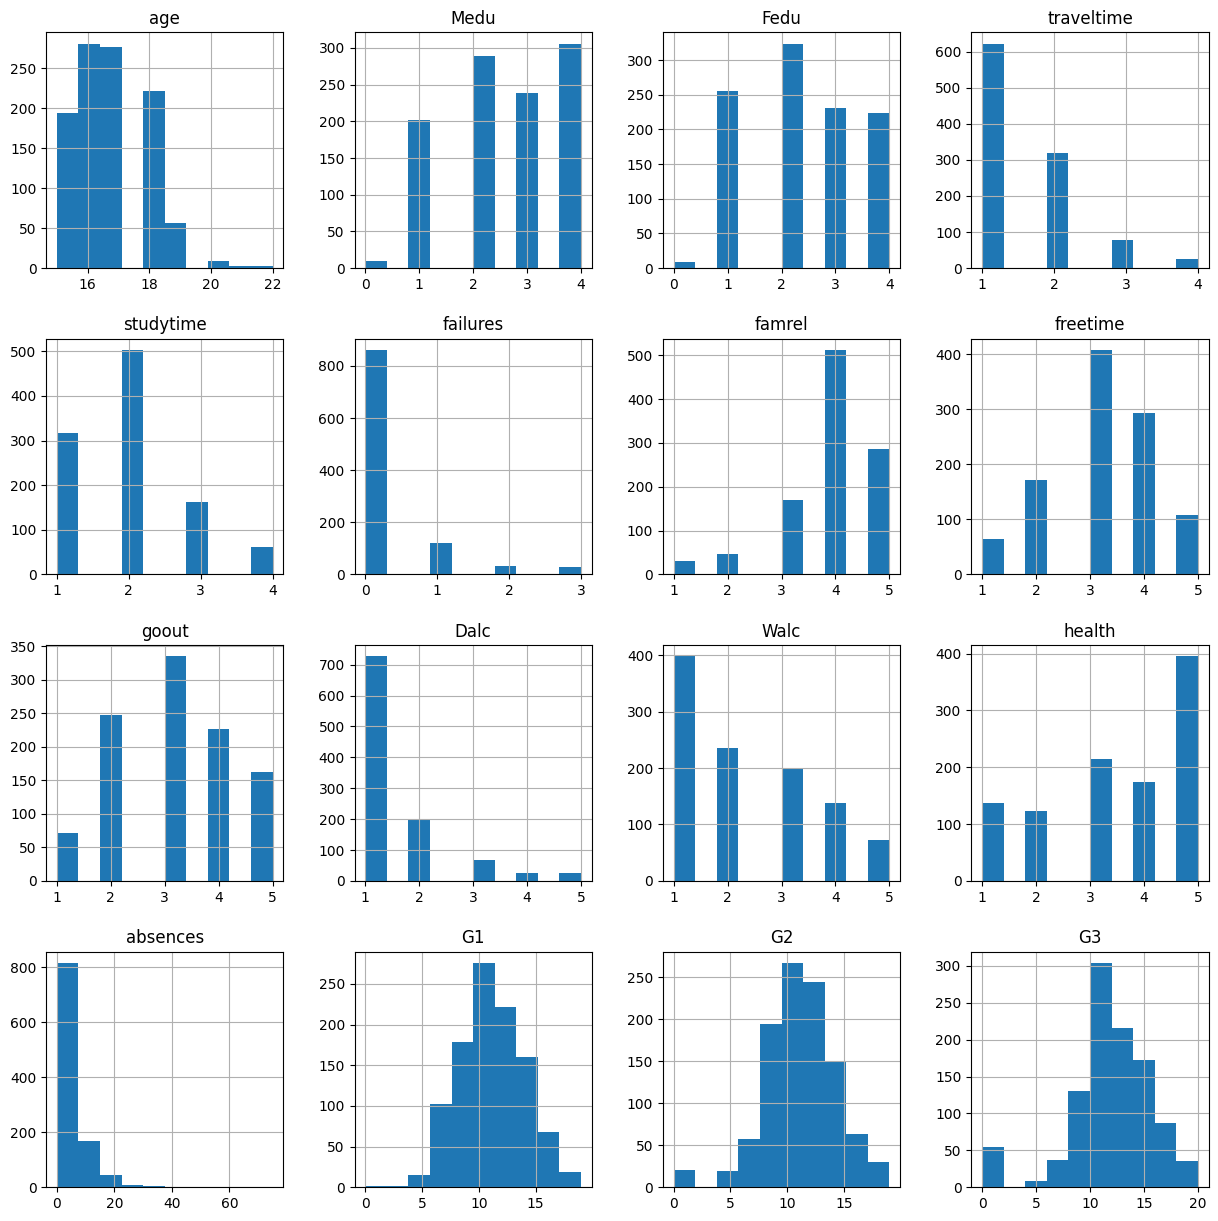

In [158]:
data.hist(figsize = (15,15))

Afin de pouvoir mieux analyser ces données, nous avons d'abord utilisé l'histogramme pour montrer la distribution de chaque type de manière générale. Nous remarquons par exemple que les absences possèdent des valeurs rares > 20 et que la plupart des valeurs sont < 20, que les notes sont centrées sur 11 environ... Toutes ces colonnes vont ensuite être vues plus en détail grâce aux boxplots.

## Box plot

### Age des étudiants

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff1b30bebf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff1b30bf160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff1b30bea70>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1b30bf6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1b30bf940>],
 'means': []}

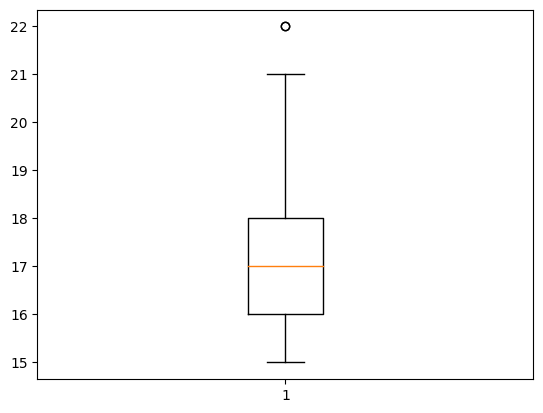

In [159]:
plt.boxplot(data['age'])

On observe une médiane de 17 ans, une valeur minimale de 15 ans et une valeur maximale de 21 ans, avec une valeur hors de boxplot de 22 ans. On va par la suite vérifier cette valeur pour déterminer s'il s'agit d'un outlier (bruit) .

In [160]:
data[data['age']>21]


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
247,GP,M,22,U,GT3,T,3,1,services,services,other,mother,1,1,3,no,no,no,no,no,no,yes,yes,5,4,5,5,5,1,16,6,8,8
674,GP,M,22,U,GT3,T,3,1,services,services,other,mother,1,1,3,no,no,no,no,no,no,yes,yes,5,4,5,5,5,1,12,7,8,5


Les données correspondantes à l'age 22 semblent pas hors la norme, donc on décide de garder ce point.

### Nombre d'absences des étudiants

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff1b38603d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff1b3afb5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff1b3862140>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1b3afab90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1b33ec310>],
 'means': []}

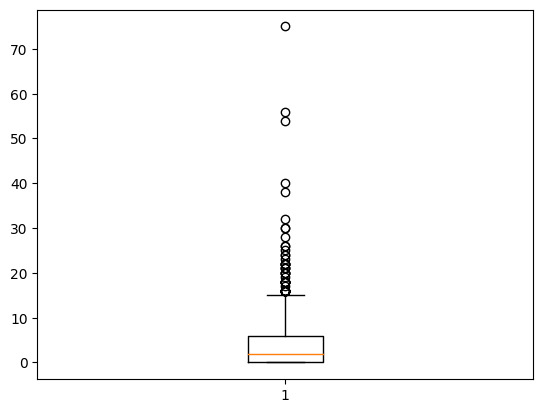

In [161]:
plt.boxplot(data['absences'])

On observe qu'ici il y a beaucoup de valeurs hors boxplot. On essaye de trouver s'il s'agit d'anomalies.

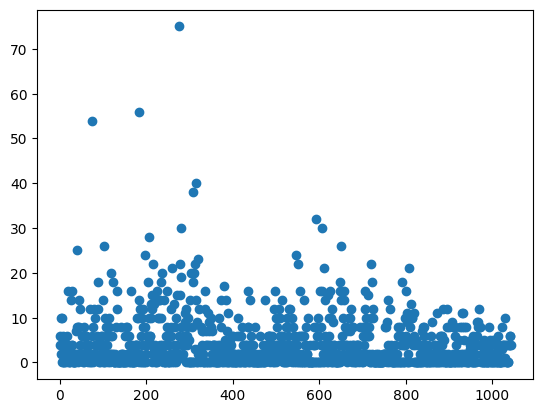

In [163]:
plt.plot(data['absences'], 'o')

Les valeurs des absences sont plutôt concentrées entre 0 et 20.

In [164]:
data[data['absences'] > 20]


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
40,GP,F,16,U,LE3,T,2,2,other,other,home,mother,2,2,1,no,yes,no,yes,no,yes,yes,yes,3,3,3,1,2,3,25,7,10,11
74,GP,F,16,U,GT3,T,3,3,other,services,home,mother,1,2,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,3,2,4,5,54,11,12,11
103,GP,F,15,U,GT3,T,3,2,services,other,home,mother,2,2,0,yes,yes,yes,no,yes,yes,yes,no,4,3,5,1,1,2,26,7,6,6
183,GP,F,17,U,LE3,T,3,3,other,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,yes,5,3,3,2,3,1,56,9,9,8
198,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,yes,yes,no,4,2,4,2,3,2,24,18,18,18
205,GP,F,17,U,GT3,T,3,4,at_home,services,home,mother,1,3,1,no,yes,yes,no,yes,yes,yes,yes,4,4,3,3,4,5,28,10,9,9
216,GP,F,17,U,GT3,T,4,3,other,other,reputation,mother,1,2,2,no,no,yes,no,yes,yes,yes,yes,3,4,5,2,4,1,22,6,6,4
260,GP,F,18,U,GT3,T,4,3,services,other,home,father,1,2,0,no,yes,yes,no,yes,yes,yes,yes,3,1,2,1,3,2,21,17,18,18
276,GP,F,18,R,GT3,A,3,2,other,services,home,mother,2,2,0,no,no,no,no,no,no,yes,yes,4,1,1,1,1,5,75,10,9,9
277,GP,M,18,U,GT3,T,4,4,teacher,services,home,mother,2,1,0,no,no,yes,yes,yes,yes,yes,no,3,2,4,1,4,3,22,9,9,9


On essaye de voir si G3 = 0 a une relation avec les absences.

<Axes: >

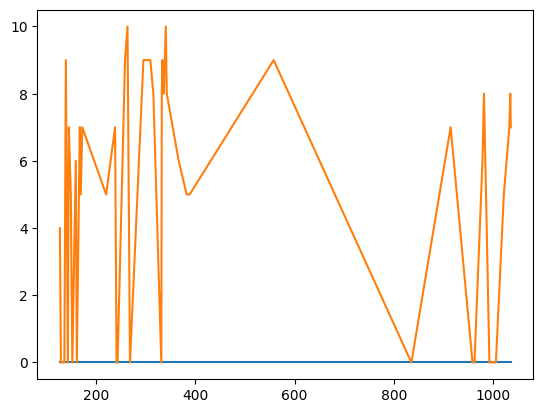

In [162]:
data[data['G3'] == 0 ]['absences'].plot()

data[data['G3'] == 0 ]['G2'].plot()


Nous ne voyons pas de relation entre les absences et le fait que G3 soit égal à 0.
Nous remarquons que si G3 = 0, G2 = 0 également. Cependant, comme nous n'avons pas l'intention d'utiliser G1 et G2 comme caractéristiques, les valeurs 0 pourraient influencer négativement les prédictions. 
Nous décidons donc de supprimer les valeurs zéros par la suite.

Avec un nombre élevé d'absences, nous pouvons voir que G3 a des résultats variables, ce qui pourrait entraîner des erreurs dans les prédictions de nos modèles.
Nous décidons d'éliminer les absences > 20 dans la partie élimination des valeurs aberrantes.

### Nombre d'échecs

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff1b45c1600>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff1b45c1b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff1b45c16f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1b45c2500>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1b45c2740>],
 'means': []}

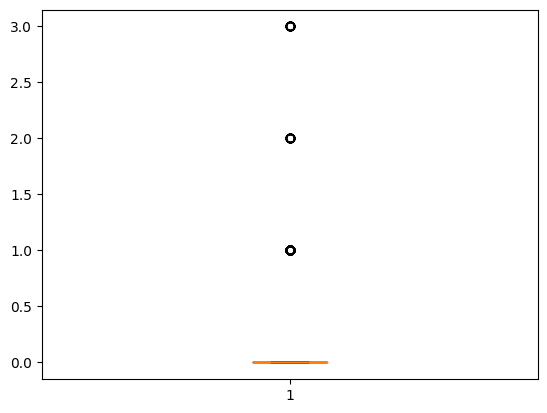

In [165]:
plt.boxplot(data['failures'])

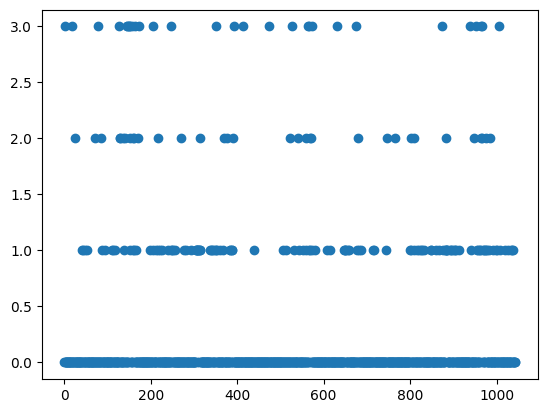

In [166]:
plt.plot(data['failures'], 'o')

In [167]:
data[data['failures'] > 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
18,GP,M,17,U,GT3,T,3,2,services,services,course,mother,1,1,3,no,yes,no,yes,yes,yes,yes,no,5,5,5,2,4,5,16,6,5,5
25,GP,F,16,U,GT3,T,2,2,services,services,home,mother,1,1,2,no,yes,yes,no,no,yes,yes,no,1,2,2,1,3,5,14,6,9,8
40,GP,F,16,U,LE3,T,2,2,other,other,home,mother,2,2,1,no,yes,no,yes,no,yes,yes,yes,3,3,3,1,2,3,25,7,10,11
44,GP,F,16,U,LE3,T,2,2,other,at_home,course,father,2,2,1,yes,no,no,yes,yes,yes,yes,no,4,3,3,2,2,5,14,10,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,MS,F,17,R,GT3,T,1,1,other,services,reputation,mother,3,1,1,no,yes,no,no,yes,yes,yes,yes,5,2,1,1,2,1,0,8,8,9
1027,MS,F,19,R,GT3,T,1,1,at_home,other,course,other,2,2,1,no,yes,no,no,yes,yes,yes,yes,4,3,3,1,1,3,4,7,8,9
1034,MS,M,19,R,GT3,T,1,1,other,services,other,mother,2,1,1,no,no,no,no,yes,yes,no,no,4,3,2,1,3,5,0,5,8,0
1035,MS,M,18,R,GT3,T,4,2,other,other,home,father,2,1,1,no,no,yes,no,yes,yes,no,no,5,4,3,4,3,3,0,7,7,0


In [168]:
data[data['failures']  == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,MS,F,18,R,GT3,T,4,4,teacher,at_home,reputation,mother,3,1,0,no,yes,no,yes,yes,yes,yes,yes,4,4,3,2,2,5,4,7,9,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


On observe que la majorité des valeurs des failures sont = 0, par contre les autres valeurs ne représentent pas d'anomalies.

### Note au premier trimestre

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff1b4714640>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff1b4714f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff1b4717370>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1b4714eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1b4b4a800>],
 'means': []}

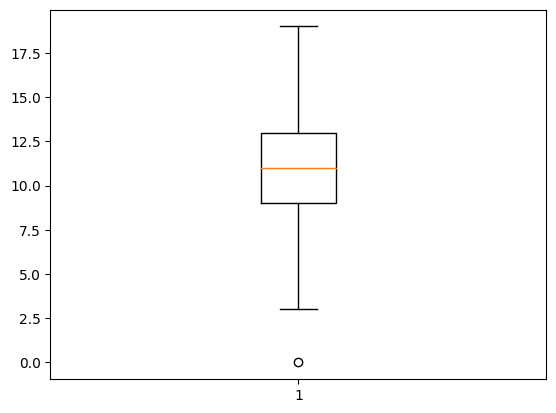

In [169]:
plt.boxplot(data['G1'])

In [170]:
data[data['G1']  == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
395,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11


### Note au deuxième trimestre

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff1b4665f60>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff1b46664a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff1b4665de0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1b46669e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1b4666c80>],
 'means': []}

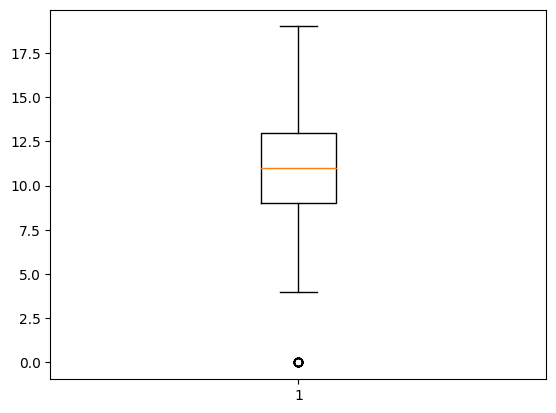

In [171]:
plt.boxplot(data['G2'])

In [207]:
data[(data['G2'] == 0 )]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
130,GP,F,15,R,GT3,T,3,4,services,teacher,course,father,2,3,2,no,yes,no,no,yes,yes,yes,yes,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,course,mother,3,1,0,no,yes,no,yes,no,yes,yes,yes,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,course,mother,4,2,0,no,yes,no,no,yes,yes,no,yes,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,course,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,course,mother,3,2,0,no,no,no,no,yes,yes,no,no,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,course,other,2,1,2,no,yes,no,yes,no,yes,yes,yes,4,3,2,1,1,5,0,4,0,0
144,GP,M,17,U,GT3,T,2,1,other,other,home,mother,1,1,3,no,yes,no,no,yes,yes,yes,no,5,4,5,1,2,5,0,5,0,0
153,GP,M,19,U,GT3,T,3,2,services,at_home,home,mother,1,1,3,no,yes,no,no,yes,no,yes,yes,4,5,4,1,1,4,0,5,0,0
162,GP,M,16,U,LE3,T,1,2,other,other,course,mother,2,1,1,no,no,no,yes,yes,yes,no,no,4,4,4,2,4,5,0,7,0,0
242,GP,M,16,U,LE3,T,4,3,teacher,other,course,mother,1,1,0,no,no,no,yes,no,yes,yes,no,5,4,5,1,1,3,0,6,0,0


On décide de ne pas éliminer ces données car ils ne sont pas des anomalies.

### Note finale

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff1b2f89db0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff1b2f8a2f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff1b2f89b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1b2f8a830>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1b2f8aad0>],
 'means': []}

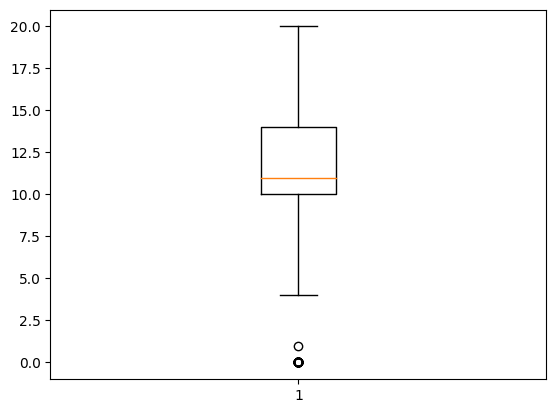

In [173]:
plt.boxplot(data['G3'])

In [208]:
data[data['G3']  < 2]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,reputation,mother,1,1,2,no,yes,no,yes,yes,yes,yes,no,3,3,3,1,2,4,0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,course,father,2,3,2,no,yes,no,no,yes,yes,yes,yes,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,course,mother,3,1,0,no,yes,no,yes,no,yes,yes,yes,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,course,mother,4,2,0,no,yes,no,no,yes,yes,no,yes,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,course,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,course,mother,3,2,0,no,no,no,no,yes,yes,no,no,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,course,other,2,1,2,no,yes,no,yes,no,yes,yes,yes,4,3,2,1,1,5,0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,course,father,2,4,0,yes,yes,no,no,yes,yes,yes,no,2,2,2,1,1,3,0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,home,mother,1,1,3,no,yes,no,no,yes,yes,yes,no,5,4,5,1,2,5,0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,home,father,1,2,3,no,yes,no,no,yes,yes,yes,no,3,3,2,1,1,3,0,6,7,0


On décide de ne pas éliminer ces données car ils ne sont pas des anomalies.

### Tous les boxplots et filtrage initial

Sélectionner les dtypes de données

<Axes: >

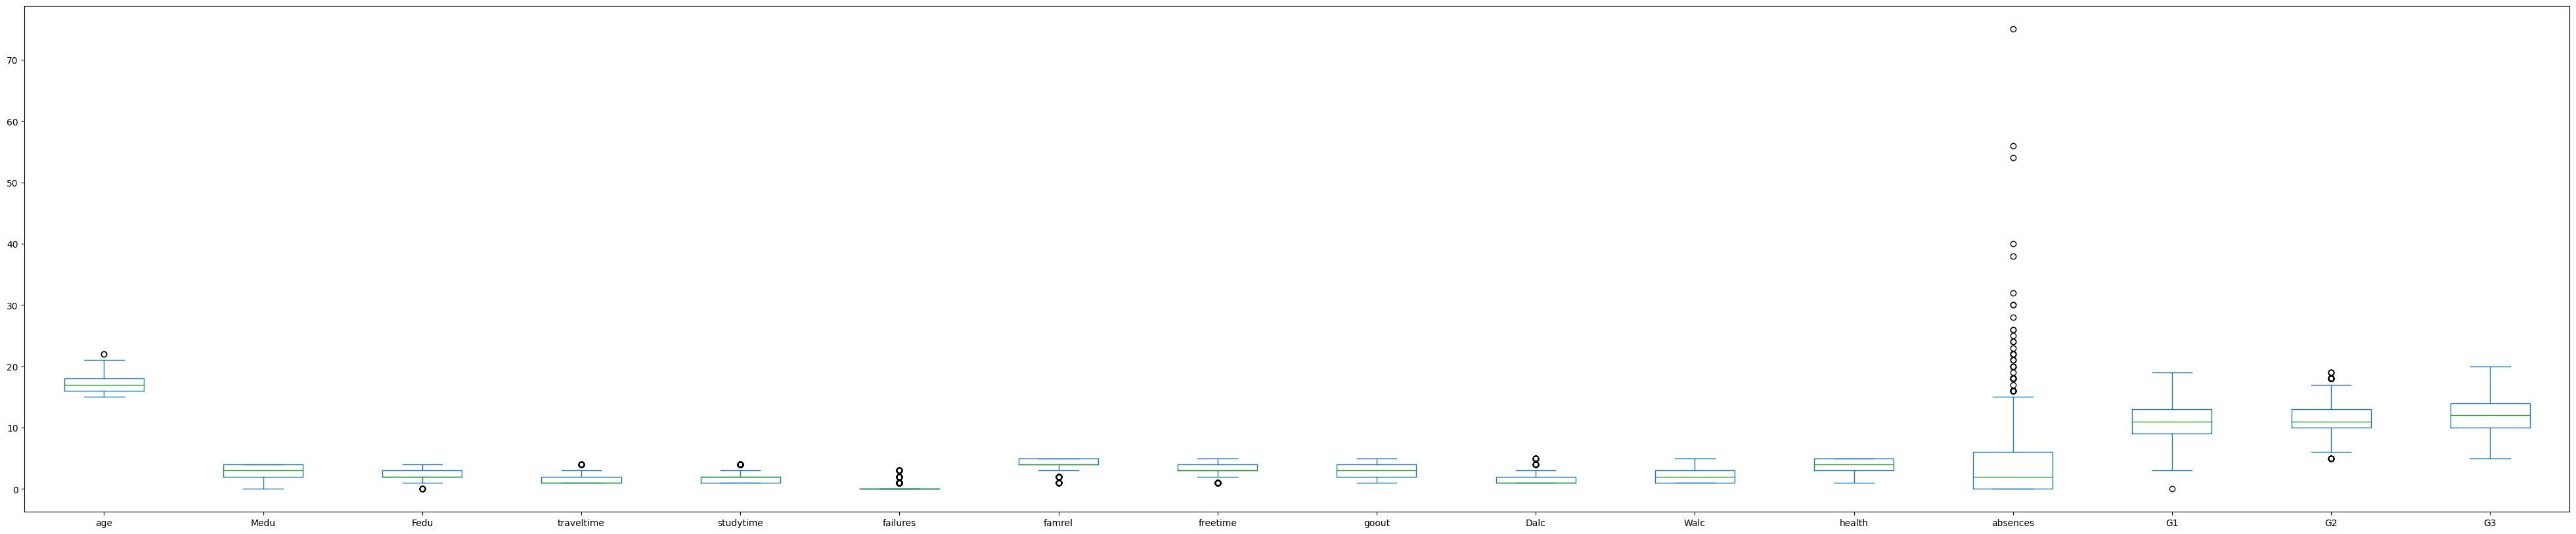

In [175]:
result = data.select_dtypes(include='number')  

for i in result.columns:
    percentile25 = data[i].quantile(0.25)
    percentile75 = data[i].quantile(0.75)
    
    iqr = percentile75-percentile25
    
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    data[data[i] > upper_limit]
    data[data[i] < lower_limit]
    
    dataset_new = data[data[i] < upper_limit ]
    dataset_new = data[data[i] > lower_limit ]
dataset_new.plot(kind='box',figsize=(50,10))

On a représenté tous les boxplots ensemble et on a décidé de supprimer les outliers par la méthode d'IQR.

L'écart interquartile (IQR) est une mesure de l'étendue des données. Elle est calculée en soustrayant le 25ème percentile du 75ème percentile des données. Les points de données qui se trouvent en dehors d'une certaine plage (par exemple, 1,5 fois l'IQR) peuvent être considérés comme des valeurs aberrantes.

# Création d'un dataset filtré

### Filtre des zeros à G3

Nous avons remarqué dans les analyses ci dessus que de nombreux étudiants ont eu la note de 0 pour leur note finale. Cette note est dans la majorité des cas due à une absence lors de l'examen ou même encore à une valeur manquante. Nous avons donc choisi de retirer des données les étudiants qui ont eu un 0 comme note finale.


In [176]:
filtered_data = data[(data.G3 != 0) & (data.absences <=20)]

### Transformation des catégories non-numériques en catégories binaire en utilisant des dummies

Plusieurs des features sont des litéraux. Il faut donc les encoder dans des feature "dummies" numériques pour pouvoir les exploiter.

In [177]:
filtered_data_with_dummies = pd.get_dummies(filtered_data,drop_first=True)
filtered_data_with_dummies.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0


### Extraction de la cible

In [178]:
y_filtered_data = filtered_data_with_dummies['G3']
y_filtered_data.head()


0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

### Extraction des features

In [179]:
X_filtered_data = filtered_data_with_dummies.drop(['G3','G2','G1'],axis=1)
X_filtered_data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0


# Création des jeu d'entrainement et de validation

In [180]:
X_filtered_train, X_filtered_test, y_filtered_train, y_filtered_test = train_test_split(X_filtered_data, y_filtered_data, test_size=0.2,random_state=2023)

## Régression linéaire simple

Nous construisons d'abord un modèle de régression linéaire car c'est le modèle le plus simple et le plus facilement interprétable.

In [181]:

regFiltered = LinearRegression().fit(X_filtered_train, y_filtered_train)
regFiltered.score(X_filtered_train, y_filtered_train)

0.32839393127148553

In [182]:
regFiltered.score(X_filtered_test,y_filtered_test)

0.29092295912393107

In [183]:
y_pred = regFiltered.predict(X_filtered_test)

In [184]:
# Calculate mean squared error and R-squared score
mse = mean_squared_error(y_filtered_test, y_pred)
r2 = r2_score(y_filtered_test, y_pred)

print("Mean squared error: ", mse)
print("Mean error", math.sqrt(mse))
print("R-squared score: ", r2)

Mean squared error:  6.211621137892372
Mean error 2.492312407763596
R-squared score:  0.29092295912393107


### Validation croisée

In [187]:

kfold = KFold(n_splits=10, shuffle = True)
cv_results_filtered = cross_val_score(LinearRegression(), X_filtered_train, y_filtered_train, cv=kfold, scoring='neg_mean_absolute_error')
print(f"{cv_results_filtered.mean():.2f} {cv_results_filtered.std():.2f}")

-1.96 0.23


## Regression polynomiale à régularisation Ridge

Création d'un fonction custom pour générer un modèle polynomial à régularisation Ridge. Une normalization est appliquée avant.

In [188]:
def polynomial_ridge_regression(degree, alpha):
    return make_pipeline(StandardScaler(), PolynomialFeatures(degree), Ridge(alpha=alpha))

Validation croisée

In [189]:
# Create a range of degrees and alphas for cross-validation
degrees = np.arange(1, 6)
alphas = np.logspace(-4, 4, 9)

In [190]:
# Initialize GridSearchCV with the custom model, hyperparameters, and the number of folds for cross-validation
grid_search = GridSearchCV(polynomial_ridge_regression(None, None),
                           param_grid={'polynomialfeatures__degree': degrees,
                                       'ridge__alpha': alphas},
                           scoring='neg_mean_squared_error',
                           cv=5)

# Fit the grid search using the training data
grid_search.fit(X_filtered_train, y_filtered_train)

best_degree = grid_search.best_params_['polynomialfeatures__degree']
best_alpha = grid_search.best_params_['ridge__alpha']

print("Best degree: ", best_degree)
print("Best alpha: ", best_alpha)

Best degree:  2
Best alpha:  1000.0


In [194]:
model_polynomial_ridge = polynomial_ridge_regression(best_degree, best_alpha)
model_polynomial_ridge.fit(X_filtered_train, y_filtered_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=1000.0))])

In [195]:
y_pred_polynomial_ridge = model_polynomial_ridge.predict(X_filtered_test)

In [196]:
# Calculate mean squared error and R-squared score
mse = mean_squared_error(y_filtered_test, y_pred_polynomial_ridge)
r2 = r2_score(y_filtered_test, y_pred_polynomial_ridge)

print("Mean squared error: ", mse)
print("Mean error", math.sqrt(mse))
print("R-squared score: ", r2)

Mean squared error:  5.343158845522805
Mean error 2.311527383684391
R-squared score:  0.39006079427445106


Le meilleur paramètre de degré du polynome est de 2 avec un alpha de 1000. Le modèle ainsi obtenu à un score R2 de 0.39 ce qui est mieux de 0.1 par rapport au modèle linéaire.

## Regression random forest

In [200]:
n_estimators_range = [10, 25, 50, 75, 100, 200, 400]
cv_scores = []

for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(model, X_filtered_train, y_filtered_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))

# Find the best n_estimators based on the highest cross-validation score
best_n_estimators = n_estimators_range[np.argmax(cv_scores)]
print("Best n_estimators: ", best_n_estimators)

Best n_estimators:  400


In [201]:
model_random_forest = RandomForestRegressor(n_estimators=best_n_estimators, random_state=0)
model_random_forest.fit(X_filtered_train, y_filtered_train)

RandomForestRegressor(n_estimators=400, random_state=0)

In [202]:
y_pred_random_forest = model_random_forest.predict(X_filtered_test)

In [203]:
# Calculate mean squared error and R-squared score
mse = mean_squared_error(y_filtered_test, y_pred_random_forest)
r2 = r2_score(y_filtered_test, y_pred_random_forest)

print("Mean squared error: ", mse)
print("Mean error", math.sqrt(mse))
print("R-squared score: ", r2)

Mean squared error:  4.957514442076605
Mean error 2.2265476509782145
R-squared score:  0.43408337491091786


On obtien alors un modèle avec un R2 de 0.43 soit 0.04 points de plus que le modèle polynomial précédent.

# Explication du modèle random forest en utilisant shap



In [197]:
explainer = shap.Explainer(model_random_forest)
shap_values = explainer(X_filtered_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


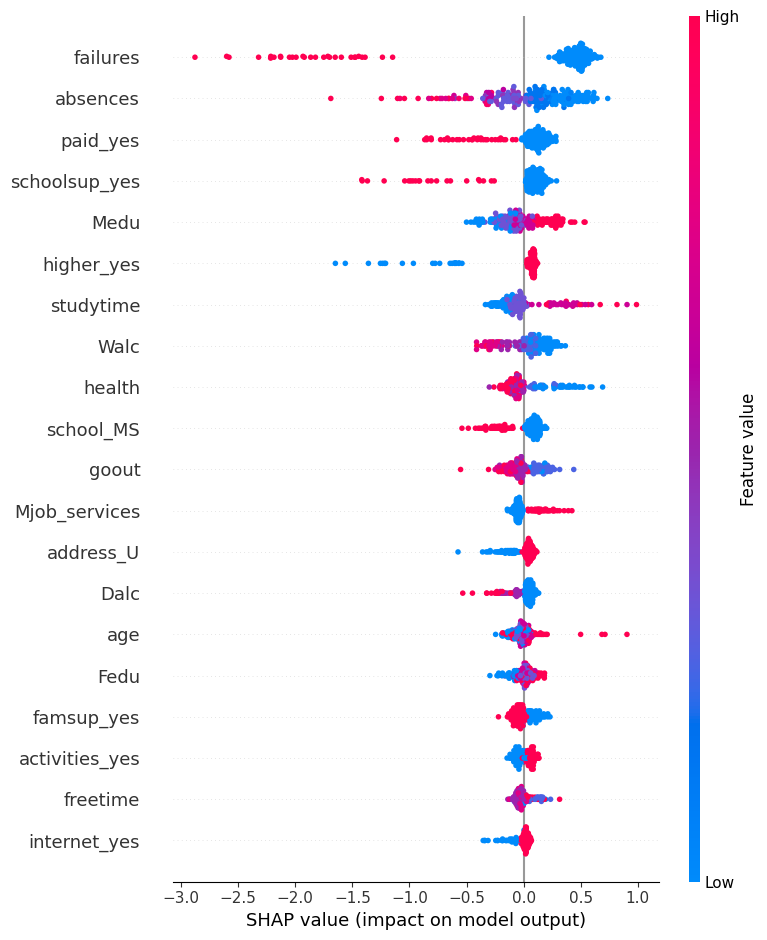

In [198]:
shap.summary_plot(shap_values, X_filtered_test)

On peut alors voir que les features les plus importantes pour décider de la note d'un étudiant sont : son nombre passé d'echecs scolaire, son nombre d'absences, les cours supplémentaires en dehors de l'école, le niveau d'éducation de la mère, le temps passé à étudier chaque semaine ou bien encore la consommation d'alcool.

In [199]:
instance_index = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[instance_index], X_filtered_test.iloc[instance_index])


On peut voir ici pour une prédiction individuelle les contributions individuelle de chaque paramètres sur la prédiction de sa note finale. on retrouve les features vu dans l'analyse précedente.

# Conclusion


Pour conclure, parmis les modèles que nous avons entrainés, le modèle random forest est celui qui obtient les meilleurs résultats. Cependant le R2 du modèle est de 0.43 ce qui signifie qu'il explique 43% de la variance des données. Ce n'est pas suffisant pour que l'on puisse utiliser le modèle pour des tâches prédictives qui ont besoin d'être fiables (Si on avait utilisé G1 et G2, on aurait bien évidemment obtenu de meilleurs résultats de prédiction) . Cependant on notera que le modèle s'explique plutôt bien comme vu grâce à l'outil shap. Cette capacité peut permettre de tout de même utiliser le modèle afin de mieux comprendre ce qui pourrai nuire à la note finale d'un étudiant (par exemple -> beaucoup d'absences -> le modèle applique une forte pénalité à la note finale -> il y a tout intéret à réduire le nombre d'abcences de l'élève). Pour continuer l'étude, on aurrai pu essayer d'entrainer un modèle de réseaux de neurone simple ou analyser plus finement les données pour vérifier s'il n'y a pas des outliers restant.